In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Data = pd.read_csv('data.csv',header=None)


In [26]:


class PreprocessData:
    def NomalizeData(Data):
        lenght = len(Data)
        normalizedData = []
        for i in range (lenght):
            normalizedData.append(float((Data[i] - min(Data) ) / ( max(Data) - min(Data)) ))
            
        return normalizedData
    
    def TestAndTrain(Data , PercentageOfTrainData):
        PercentageOfTrainData = float(PercentageOfTrainData / 100)
        Train_DataFrame = Data.sample(frac=PercentageOfTrainData)
        Test_DataFrame =Data.drop(Train_DataFrame.index)
        
        return Train_DataFrame , Test_DataFrame
    

In [27]:
#devide data to test and train 
Dataset = PreprocessData.TestAndTrain(Data , 70)

TrainData = Dataset[0]
TestData = Dataset[1]


In [28]:
#normalize train data 
x= PreprocessData.NomalizeData( pd.Series.tolist( TrainData[0]))
y = PreprocessData.NomalizeData( pd.Series.tolist( TrainData[1]))

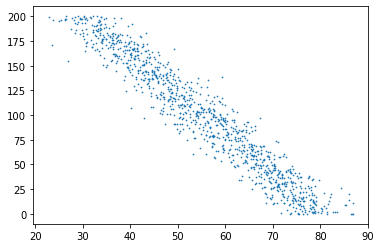

In [43]:
plt.plot(TrainData[1] , TrainData[0] , "o" , markersize=0.7 )

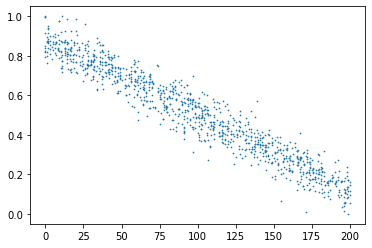

In [41]:
plt.plot(TrainData[0] , y , "o" , markersize=0.7 )

In [29]:
#add 1 colum  to X data 
biasX = np.c_[np.ones((len(x) , 1)) , x ]

In [30]:
#computing theta
def ComputingTheta(X ,Y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    return theta

In [31]:
#computing hypothesis function 
def ComputingHypothesis(X , Theta):
    return np.dot(X , Theta)


In [32]:
#computing j(theta)
def ComputingJtheta(hypothesisTeta , Y ):
    val = 0
    for i in range(len(Y)):
        val += ((1/2) * (( hypothesisTeta[i] - Y[i])**2))
    return val
        
    

In [33]:
theta = ComputingTheta(biasX , y)
predictedTrainY = ComputingHypothesis(biasX , theta)
def ComputeAcurecy( y , ypred):
    ymean = np.mean(y)
    num = np.sum((y-ypred)**2)
    denom = np.sum((y-ymean)**2)
    output = 1 - (num/denom)
    return output
accuracy = round((ComputeAcurecy(y , predictedTrainY) * 100),2)
print ("accuracy is = " + str(accuracy) + " % " )

accuracy is = 92.91 % 


Text(0, 0.5, 'Y')

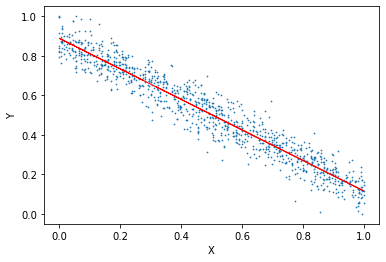

In [34]:

plt.plot(x , y , "o" , markersize=0.7 )
plt.plot(x , predictedTrainY , "-r" , linewidth=1 )
plt.xlabel("X")
plt.ylabel("Y")

In [35]:
#normalize test data 
testX= PreprocessData.NomalizeData( pd.Series.tolist( TestData[0]))
testY = PreprocessData.NomalizeData( pd.Series.tolist( TestData[1]))


#compute the Y for test data with theta
def ComputeTestY(testX , theta):
    #add 1 colum  to X test data 
    biasTestX = np.c_[np.ones((len(testX) , 1)) , testX ]
    
    predictedYtest = biasTestX.dot(theta)
    return predictedYtest

[0.5329155  0.19324187 0.16622238 0.55221514 0.69503246 0.69503246
 0.74907145 0.20868158 0.38237832 0.65643318 0.56765485 0.65257326
 0.70275232 0.70275232 0.79153065 0.36307869 0.77609094 0.15078267
 0.84170971 0.50589601 0.13534296 0.60625413 0.29745992 0.41325774
 0.48273644 0.66415304 0.44027724 0.60625413 0.56765485 0.30131984
 0.3514989  0.27044042 0.32833934 0.18166209 0.77995087 0.53677543
 0.72205195 0.32061948 0.23570107 0.13920288 0.60625413 0.47115666
 0.31289963 0.22798122 0.21640144 0.68731261 0.15078267 0.64099347
 0.85714942 0.88802884 0.24728086 0.22412129 0.47887651 0.3785184
 0.76065123 0.59467434 0.6023942  0.6718729  0.73363174 0.69503246
 0.55607507 0.88030899 0.22412129 0.25114078 0.29745992 0.44413717
 0.17780216 0.39395811 0.7567913  0.37079854 0.44027724 0.68345268
 0.32061948 0.44027724 0.16236245 0.72591188 0.23184115 0.39009818
 0.70275232 0.76837109 0.82627    0.26658049 0.66415304 0.40553789
 0.43641731 0.33219926 0.40553789 0.50203608 0.33219926 0.46729

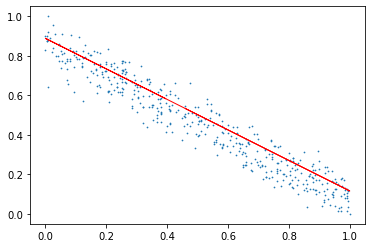

In [36]:
predictedYtest = ComputeTestY(testX , theta )  
print(predictedYtest)
plt.plot(testX , testY , "o" , markersize=0.7 )
plt.plot(testX , predictedYtest , "-r" , linewidth=1)

In [31]:
jThetatrain = ComputingJtheta(predictedTrainY , y)
JThetatest = ComputingJtheta(predictedYtest ,testY)

print(jThetatrain  )
print (JThetatest)


1.9304475143609579
0.9929773754384136
